# WeatherPy
----
#### Note
* This assignment was complete in collaboration with Ashley Parra.
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
#### Obvervations
* Based on the graph of Northern Hemisphere - Latitude vs Max Temp, we observed a strong negative correlation (high negative value) between latitude and temperature. It tells us the the higher the latitude, lower the maximum temperature will be (consistent with what is expected further north we travel). The r-value also indicates that the linear regression formula we created allows us to closely predict the temperature based on any given latitude.
* Based on the graph of Southern Hemisphere - Latitude vs Max Temp, we observed a strong positive correlation (higher than 0.5 r-value) between latitude and temperature. While not as strong as the Northern Hemisphere graph, it still gives us relative accuracy in terms of predicting the temperature using the linear regression model we created.
* For the remainder comparisons: (Latitude vs Humidity and Latitude vs Cloudiness), the results indicates very weak correlation between the factors. This is first reinforced by the scatter plots, where the datapoints were almost evenly spread, with no visible trend. The second reinforced evidence is the r-value and the linear regression models created. Both comparison had very low r-values (less than 0.5/-0.5, depending on the trend). While we cannot for certain consider that they have absolutely no relationships, we can say the relationships between the factors are weak, and can be disregarded for our purpose. However, further comparison between Humidy and Cloudiness could be explored to consider any possible relationship between the two.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}units={units}&appid={weather_api_key}"
# Set variables
city_data = []
sets = 1
count = 1
# Print beginning of data retrieval
print("Beginning Data Revrieval")
print("=================================================")
# Beging FOR loop for retreiving data
for index, city in enumerate(cities):
    # Conditions counting for sets of 50
    if index >= 50 and index % 50 == 0:
        sets += 1
        count = 1
        time.sleep(10)
    # Setting url for retrieval
    city_url = query_url +"&q="+ city.replace(" ", "+")
    print(f"Processing record {count} of Set {sets} | {city}")
    count += 1
    # Setting try and exceptions
    
    try:
        response = requests.get(city_url).json()
        lat = response["coord"]["lat"]
        lng = response["coord"]["lon"]
        temp_max = response["main"]["temp_max"]
        hum = response["main"]["humidity"]
        clouds = response["clouds"]["all"]
        winds = response["wind"]["speed"]
        country = response["sys"]["country"]
        pulled_date = response["dt"]
        # Put inside a dictionary and append to the city_data list
        city_data.append({
            "City": city,
            "Lat": lat,
            "Lng": lng,
            "Max Temp.": temp_max,
            "Humidity": hum,
            "Cloudiness": clouds,
            "Wind Speed": winds,
            "Country": country,
            "Date": pulled_date
        })    
    except (KeyError, IndexError):
        print("City " + "\033[1m" + "not" + "\033[0m" + " found. Skipping...")
        pass

print("=================================================")
print("Data Retrieval Complete")
print("=================================================")

Processing record 18 of Set 4 | longlac
City not found. Skipping...
Processing record 19 of Set 4 | severo-kurilsk
Processing record 20 of Set 4 | talaya
Processing record 21 of Set 4 | stornoway
Processing record 22 of Set 4 | vila franca do campo
Processing record 23 of Set 4 | itanhaem
Processing record 24 of Set 4 | karratha
Processing record 25 of Set 4 | lavrentiya
Processing record 26 of Set 4 | brattleboro
Processing record 27 of Set 4 | nizhniy tsasuchey
Processing record 28 of Set 4 | torbay
Processing record 29 of Set 4 | lebu
Processing record 30 of Set 4 | mahebourg
Processing record 31 of Set 4 | faya
Processing record 32 of Set 4 | beyneu
Processing record 33 of Set 4 | chuy
Processing record 34 of Set 4 | santa maria
Processing record 35 of Set 4 | macon
Processing record 36 of Set 4 | necochea
Processing record 37 of Set 4 | ilulissat
Processing record 38 of Set 4 | nome
Processing record 39 of Set 4 | tabiauea
City not found. Skipping...
Processing record 40 of Set 4 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
city_df = pd.DataFrame(city_data)
city_df.to_csv("City Weather.csv", index=False)
city_df.head()

,City,Lat,Lng,Max Temp.,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,79.03,72,100,16.31,PF,1619229547
1,gizo,-8.1030,156.8419,84.33,71,79,7.65,SB,1619229614
2,punta arenas,-53.1500,-70.9167,42.80,93,40,3.44,CL,1619229607
3,bluff,-46.6000,168.3333,48.99,87,88,7.00,NZ,1619229496
4,kapaa,22.0752,-159.3190,77.00,73,75,17.27,US,1619229561


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.
humidity_indices = []
for i in city_df.index:
    if city_df.iloc[i, 4] > 100:
        humidity_indices.append(i)

len(humidity_indices)

0

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

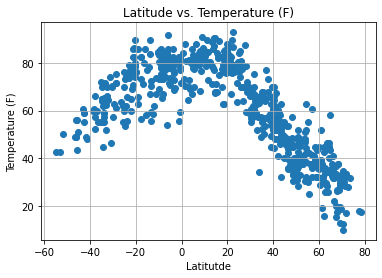

In [10]:
x_values = city_df["Lat"]
y_values = city_df["Max Temp."]
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs. Temperature (F)")
plt.grid(True)
plt.show()

## Latitude vs. Humidity Plot

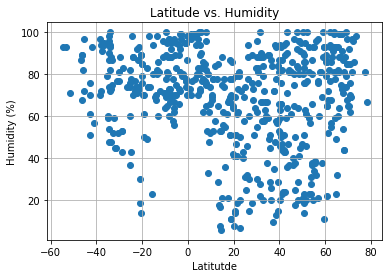

In [11]:
x_values = city_df["Lat"]
y_values = city_df["Humidity"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid(True)
plt.show()

## Latitude vs. Cloudiness Plot

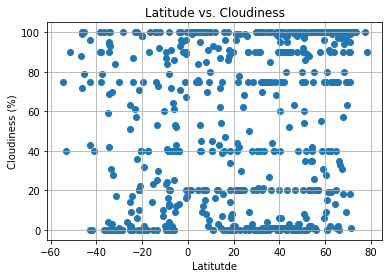

In [12]:
x_values = city_df["Lat"]
y_values = city_df["Cloudiness"]
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid(True)
plt.show()

## Latitude vs. Wind Speed Plot

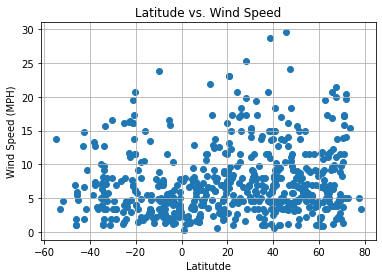

In [13]:
# Getting x and y values
x_values = city_df["Lat"]
y_values = city_df["Wind Speed"]
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (MPH)")
plt.title("Latitude vs. Wind Speed")
plt.grid(True)
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.9085039687861349


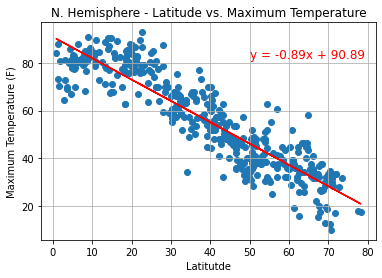

In [14]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] >= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 3])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Maximum Temperature (F)")
plt.title("N. Hemisphere - Latitude vs. Maximum Temperature")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (50, 82), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6944298369705028


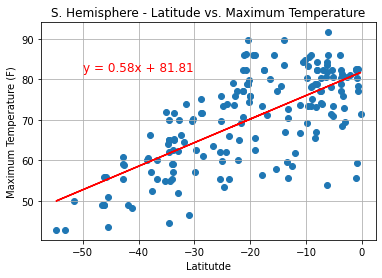

In [15]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] <= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 3])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Maximum Temperature (F)")
plt.title("S. Hemisphere - Latitude vs. Maximum Temperature")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-50, 82), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10351511198402587


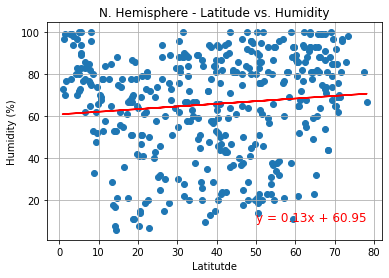

In [16]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] >= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 4])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Humidity (%)")
plt.title("N. Hemisphere - Latitude vs. Humidity")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (50, 10), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09290252814977086


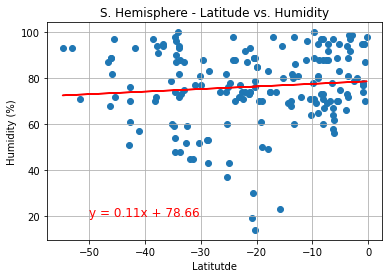

In [17]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] <= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 4])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Humidity (%)")
plt.title("S. Hemisphere - Latitude vs. Humidity")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-50, 20), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.14814115605623043


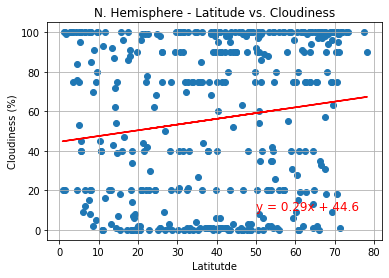

In [18]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] >= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 5])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness (%)")
plt.title("N. Hemisphere - Latitude vs. Cloudiness")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (50, 10), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06936844803043997


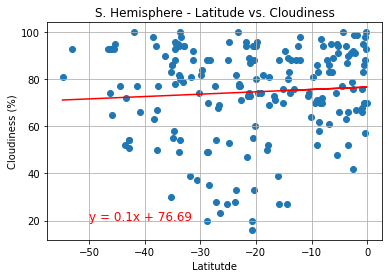

In [94]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] <= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 4])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Cloudiness (%)")
plt.title("S. Hemisphere - Latitude vs. Cloudiness")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-50, 20), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08990324839087577


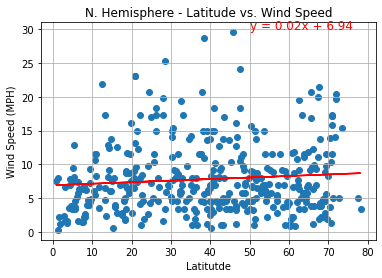

In [19]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] >= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 6])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (MPH)")
plt.title("N. Hemisphere - Latitude vs. Wind Speed")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (50, 30), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09290252814977086


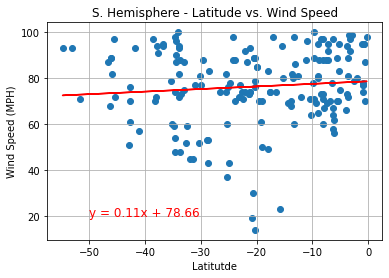

In [20]:
# Getting x and y values
x_values = []
y_values = []
for i in city_df.index:
    if city_df.iloc[i, 1] <= 0:
        x_values.append(city_df.iloc[i, 1])
        y_values.append(city_df.iloc[i, 4])
x_values = np.array(x_values)
y_values = np.array(y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
# Scatter plot
plt.scatter(x_values, y_values)
plt.xlabel("Latitutde")
plt.ylabel("Wind Speed (MPH)")
plt.title("S. Hemisphere - Latitude vs. Wind Speed")
plt.grid(True)
# Line plot
plt.plot(x_values, regress_values, color="red")
plt.annotate(line_eq, (-50, 20), fontsize=12, color="red")
# Print r-value and show plot
print(f"The r-value is: {rvalue}")
plt.show()